# Perceptron Implementation

We have created an implementation of a perceptron with the following properties:


1.   The weigths updating is carried out by means of **Delta Rule**
2.   The activation function by defaults is $Tanh$




In [2]:
import random
import numpy
import math

class Perceptron():
    
    #Initialization
    def __init__(self, learning_rate=0.01, activation=math.tanh, epochs=100):
        self.n = learning_rate
        self.epochs=epochs
        self.activation=activation
        self.w=None

    #Training Method
    def fit(self, xTrain:list, yTrain:list):
        self.w = self.__generarPesos(len(xTrain[0])+1)
        x = self.__fillX(xTrain)
        y = yTrain
        for i in range(self.epochs):
            deltaW = self.__aprendizaje(x, y) #Basic perceptron operation
            self.w = self.__actualizarPesos(deltaW) # Update Weigths

        return self.w
    #Prediction Method
    def predict(self, dataSet: list):
        predicciones = []
        
        for i in range(0,len(dataSet)):
            prediccion = self.__predictVector(dataSet[i])
            predicciones.append(prediccion)

        return predicciones

######################## Métodos auxiliares ########################
    def __predictVector(self, vector: list):
        vectorX0 = self.__addX0(vector)

        resultado = self.__funcionActivacion(self.__productoPunto(self.w,vectorX0))
        return resultado

    def __generarPesos(self, longitud: int, seed=1):
        random.seed(seed)
        w = []
        for i in range(0,longitud):
            w.append(random.uniform(-1,1))
        return w

    def __funcionActivacion(self, yValue: float):
        evaluacion = self.activation(yValue)
        evaluacion =math.ceil(evaluacion)
        if (evaluacion == -1): # consider tanh, sigm
            return 0
        else:
            return 1

    def __productoPunto(self, w: list, x: list):
        resultado = numpy.dot(w, x)
        return resultado

    def __aprendizaje(self, x: list, y: list):
        deltaW = []
        for i in range(len(self.w)):
            wi = 0
            for j in range(len(x)):
                od = self.__predictVector(x[j])
                wi += (y[j] - od) * x[j][i] #Gradiente descendente
            wi *= self.n
            deltaW.append(wi)
        return deltaW

    def __actualizarPesos(self, deltaW: list):
        resultado = []
        for i in range(len(self.w)):
            resultado.append(self.w[i]+deltaW[i])
        return resultado

    def __addX0(self, xi):
        xiX0 = xi.copy()
        
        if len(xiX0) != len(self.w):
            xiX0.insert(0,1)
        
        return xiX0

    def __fillX(self, x):
        xFilled = []
        for i in range(len(x)):
            xFilled.append(self.__addX0(x[i]))
        return xFilled

    def obtenerX(self, dataSet: list):
        x = []
        for i in range(len(dataSet)):
            vX = []
            for j in range(len(dataSet[i])-1):
                vX.append(dataSet[i][j])
            x.append(vX)
        return x

    def obtenerY(self, dataSet: list):
        y = []
        for i in range(len(dataSet)):
                y.append(dataSet[i][-1])
        return y

## Load Data

In [4]:
import pandas as pd
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Mount Directory
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['clientes.csv']), header=0, encoding="utf-8",sep="\t")
dataset.columns=['x1', 'x2','default']
#Online
#Load dataset
#dataset = pd.read_csv('data3.csv')

#Show dataset 
dataset.head()
dataset.describe()


,x1,x2,default
count,199.000000,199.000000,199.000000
mean,0.389006,0.438467,0.502513
std,0.125591,0.287411,0.501255
min,0.150372,0.050981,0.000000
25%,0.283122,0.149911,0.000000
50%,0.400260,0.603972,1.000000
75%,0.489189,0.720197,1.000000
max,0.654714,0.825490,1.000000


##**Data Visualization**

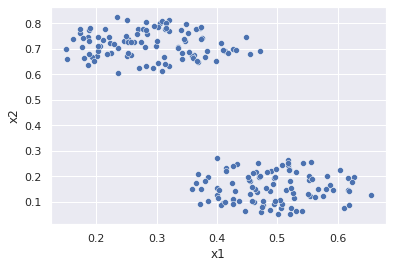

In [5]:
#Optional: Visualize data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="x1", y="x2", data=dataset)

## **Training**

In [6]:

#This task depends on several assumptions based on experience, for instance, 
X = dataset.loc[:, 'x1':'x2'] 
y = dataset['default'] # Unknown rows, one column



### Define training and test datasets

In [7]:
from sklearn.model_selection import train_test_split
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Create an instance of my perceptron

In [8]:
myPerceptron = Perceptron(epochs=1000, learning_rate=0.1)

### Training process

In [9]:
myPerceptron.fit(X_train.values.tolist(),
                 y_train.values.tolist())

[-16.631271511775196, -8.678273619011819, 2.644371576091462]

## **Prediction**

In [ ]:
y_pred=myPerceptron.predict(X_test.values.tolist())

print(y_test)
print(y_pred)

18     0
169    1
106    1
92     0
176    1
183    1
5      0
139    1
12     0
160    1
61     0
124    1
164    1
145    1
80     0
7      0
33     0
129    1
37     0
74     0
159    1
144    1
45     0
158    1
60     0
122    1
178    1
184    1
97     0
44     0
16     0
55     0
83     0
110    1
22     0
188    1
135    1
4      0
137    1
193    1
Name: default, dtype: int64
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test.values.tolist(), y_pred)
print(confusion_matrix)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[19  0]
 [21  0]]
Perceptron Accuracy: 0.475


### Prediction Visualization

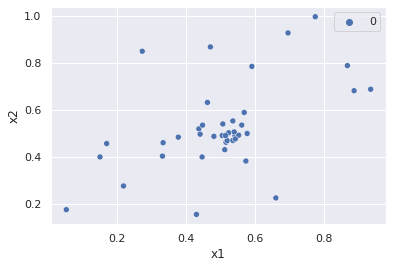

In [ ]:
ax = sns.scatterplot(x="x1", y="x2", data=X_test, hue=y_pred)

## **Exercise 1**: 
Train the perceptron using the dataset clientes2.csv and describe the resulting predictions.

## **Exercise 2:**
Execute the following code, that contains the definition of another activation function known as "sigmoid". Modify the code of the perceptron to use this function.



In [ ]:
def sigmoid(value):
    if -value > np.log(np.finfo(type(value)).max):
        return 0.0    
    a = np.exp(-value)
    return 1.0/ (1.0 + a)